# Cell Types Project
### Exploring L4 & L5 Neuronal Dynamics in Epilepsy of Mouse vs. Human Specimens

## Team Member Names & Contributions
### Epic Neuronerds

- **Ber Al Jaibaji A16810381**:
- **Elizaveta Beltyukova**: 
- **Doris Tian**:

## Abstract

Epilepsy disrupts neuronal excitability, particularly in Layer 4 (L4) and Layer 5 (L5) neurons, which play distinct roles in sensory processing and cortical output. This study compares the electrophysiological properties and gene expression profiles of L4 and L5 neurons in epileptic humans vs mouse conditions across different age groups. Using single-cell RNA sequencing and electrophysiology (EEG/iEEG, patch-clamp data), we analyze differences in ion channel expression, synaptic activity, and neuronal excitability. Our findings aim to reveal how L5 neurons contribute more significantly to seizure propagation, offering potential targets for epilepsy treatment.

## Research Question

#### How do Layer 4 (L4) and Layer 5 (L5) neurons differ in their electrophysiological properties and gene expression profiles in epileptic versus non-epileptic conditions across different age groups?

# Background and Prior Work

Epilepsy is a prevalent neuro-disorder that is characterized by recurrent episodes of seizure. This is a rather established field with the common understanding of the cause being the imbalance between excitatory neuron activation and inhibitory neuron insufficiency. Epileptogenesis is associated with complex and multiple risk factors. Previous results show the upregulation of risk genes encoding ion channels, which is closely related to neuronal firing, neuron excitation, and potential loss of inhibition. This shows the significance of investigating the difference in electrophysiology data and the transcriptomics that is relevant to epilepsy. A study by Ulrich Pfisterer et al. analyzed the gene expression of the output layer L5, and concluded the upregulation of genes encoding glutamate receptor subunits e.g. GRIA1 ,AMPA Receptor e.g. CKAMP44, and voltage-gated ion channels e.g. SCN1A. Therefore, we first aim to utilize a new data modality to validate and illustrate the genetic data and also expand on the electrophysiology data on L5 according to epilepsy. 
 
Furthermore, Another study (Bod R) shows that L4, the granular layer of the cortex is also potentially related to epileptic hyperexcitation, which however the previous study by Ulrich Pfisterer didn’t address. Therefore, we decide to incorporate electrophysiology and transcriptome data to investigate the role of L4 neurons in epilepsy. To validate the result, we also aim to compare the difference in transcriptome between excitatory and inhibitory neurons to show whether this imbalance dynamic is genetically related.
 
The first data modality we incorporate to address the question is Allen Brain Atlas - Cell Type Database contains RNA sequencing and electrophysiology of L4 and L5 which allows analysis of the transcriptome in those cell types. Additionally, Temple University EEG Seizure Corpus (TUH EEG) contains EEG signals from epileptic and non-epileptic patients, which allows the comparison of seizure episodes with electrophysiology data to baseline. By wrangling and visualizing the datasets mentioned, we aim to investigate the difference in electrophysiology and transcriptome of L4 and L5 neurons between epileptic and non-epileptic individuals.


### References (include links):
(1)

(2)

## Hypothesis


In epilepsy, Layer 5 (L5) pyramidal neurons exhibit greater hyperexcitability and altered gene expression compared to Layer 4 (L4) neurons, contributing more significantly to seizure propagation. We expect L5 neurons to show increased firing rates, prolonged action potentials, and upregulated excitatory ion channel genes (SCN1A, SCN8A), while L4 neurons may exhibit milder excitability changes. Additionally, we hypothesize that these differences vary across age groups, with younger brains showing distinct gene expression patterns compared to adults.

## Setup
*Are there packages that need to be imported, or datasets that need to be downloaded?*

In [12]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
from scipy.stats import spearmanr, pearsonr
import statsmodels.api as sm

## Data Wrangling

Describe your data wrangling steps here.

In [16]:

file_path = "/home/bmaljaibaji/cell_types_specimen_details_mouse.csv"

data = pd.read_csv(file_path)


print(f"Dataset Shape: {data.shape}")
print("Available Columns:", data.columns)

# Filter for Layer 4 (L4) and Layer 5 (L5)
l4_data = data[data['structure__layer'] == '4']
l5_data = data[data['structure__layer'] == '5']

# Separate human and mouse data
human_L4 = l4_data[l4_data['donor__species'] == 'Homo Sapiens']
human_L5 = l5_data[l5_data['donor__species'] == 'Homo Sapiens']
mouse_L4 = l4_data[l4_data['donor__species'] == 'Mus musculus']
mouse_L5 = l5_data[l5_data['donor__species'] == 'Mus musculus']

ephys_columns = [
    'nr__max_euclidean_distance', 'nr__number_stems', 'nr__number_bifurcations',
    'nr__average_contraction', 'nr__average_parent_daughter_ratio', 'ef__fast_trough_v_long_square',
    'ef__upstroke_downstroke_ratio_long_square', 'ef__adaptation', 'ef__f_i_curve_slope',
    'ef__threshold_i_long_square', 'ef__tau', 'ef__avg_isi', 'ef__avg_firing_rate',
    'ef__ri', 'ef__peak_t_ramp', 'ef__vrest'
]


ephys_columns_filtered = [col for col in ephys_columns if col in data.columns]


human_L4_ephys = human_L4[ephys_columns_filtered].dropna()
human_L5_ephys = human_L5[ephys_columns_filtered].dropna()
mouse_L4_ephys = mouse_L4[ephys_columns_filtered].dropna()
mouse_L5_ephys = mouse_L5[ephys_columns_filtered].dropna()


def compute_stats(data):
    if data.empty:
        return np.full((8, len(ephys_columns_filtered)), np.nan)
    
    return np.array([
        np.count_nonzero(~np.isnan(data), axis=0),
        np.nanmean(data, axis=0),
        np.nanstd(data, axis=0),
        np.nanmin(data, axis=0),
        np.nanpercentile(data, 25, axis=0),
        np.nanpercentile(data, 50, axis=0),
        np.nanpercentile(data, 75, axis=0),
        np.nanmax(data, axis=0)
    ])


human_L4_stats = compute_stats(human_L4_ephys)
human_L5_stats = compute_stats(human_L5_ephys)
mouse_L4_stats = compute_stats(mouse_L4_ephys)
mouse_L5_stats = compute_stats(mouse_L5_ephys)


stats_labels = ['Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']


human_L4_stats_df = pd.DataFrame(human_L4_stats, index=stats_labels, columns=ephys_columns_filtered)
human_L5_stats_df = pd.DataFrame(human_L5_stats, index=stats_labels, columns=ephys_columns_filtered)
mouse_L4_stats_df = pd.DataFrame(mouse_L4_stats, index=stats_labels, columns=ephys_columns_filtered)
mouse_L5_stats_df = pd.DataFrame(mouse_L5_stats, index=stats_labels, columns=ephys_columns_filtered)


print("\nHuman Layer 4 (L4) Neuron Statistics:")
display(human_L4_stats_df)

print("\nHuman Layer 5 (L5) Neuron Statistics:")
display(human_L5_stats_df)

print("\nMouse Layer 4 (L4) Neuron Statistics:")
display(mouse_L4_stats_df)

print("\nMouse Layer 5 (L5) Neuron Statistics:")
display(mouse_L5_stats_df)

Dataset Shape: (2333, 54)
Available Columns: Index(['line_name', 'specimen__id', 'specimen__name', 'specimen__hemisphere',
       'structure__id', 'structure__name', 'structure__acronym',
       'structure_parent__id', 'structure_parent__acronym', 'structure__layer',
       'nr__max_euclidean_distance', 'nr__number_stems',
       'nr__number_bifurcations', 'nr__average_contraction',
       'nr__average_parent_daughter_ratio', 'nr__reconstruction_type',
       'nrwkf__id', 'erwkf__id', 'ef__fast_trough_v_long_square',
       'ef__upstroke_downstroke_ratio_long_square', 'ef__adaptation',
       'ef__f_i_curve_slope', 'ef__threshold_i_long_square', 'ef__tau',
       'ef__avg_isi', 'ef__avg_firing_rate', 'ef__ri', 'ef__peak_t_ramp',
       'ef__vrest', 'si__height', 'si__width', 'si__path', 'csl__x', 'csl__y',
       'csl__z', 'csl__normalized_depth', 'cell_reporter_status', 'm__glif',
       'm__biophys', 'm__biophys_perisomatic', 'm__biophys_all_active',
       'tag__apical', 'tag__dendr

,nr__max_euclidean_distance,nr__number_stems,nr__number_bifurcations,nr__average_contraction,nr__average_parent_daughter_ratio,ef__fast_trough_v_long_square,ef__upstroke_downstroke_ratio_long_square,ef__adaptation,ef__f_i_curve_slope,ef__threshold_i_long_square,ef__tau,ef__avg_isi,ef__avg_firing_rate,ef__ri,ef__peak_t_ramp,ef__vrest
Count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
Mean,604.117953,4.466667,19.600000,0.858872,0.958022,-54.918753,2.834585,0.067718,0.252395,67.333333,23.921154,68.867921,26.954083,226.492597,4.365693,-68.259888
Std,225.912188,0.884433,4.572381,0.029423,0.037080,5.241596,0.861075,0.055768,0.107755,44.342104,9.560321,36.756365,39.498041,98.753088,3.125493,3.404470
Min,288.950400,3.000000,11.000000,0.817892,0.903433,-65.406258,1.452890,0.006228,0.014894,30.000000,7.177321,5.800000,6.932729,65.781251,1.916387,-74.260269
25%,399.501150,4.000000,16.500000,0.833241,0.926314,-55.109377,2.349914,0.024586,0.170868,50.000000,18.268624,47.941479,11.597113,169.218823,2.999253,-71.281368
50%,610.174005,4.000000,21.000000,0.850827,0.958235,-53.281250,2.643522,0.055946,0.279016,50.000000,26.231871,58.747500,17.022001,221.406132,3.284380,-68.179855
75%,787.804729,5.000000,23.500000,0.888788,1.000000,-52.000004,3.245118,0.082007,0.325193,70.000000,30.568312,87.073182,20.908558,283.515647,4.657842,-65.513210
Max,962.801000,6.000000,26.000000,0.900537,1.000000,-46.687504,4.722566,0.196552,0.421007,210.000000,38.929509,144.243333,172.413793,438.750058,14.666587,-62.545727



Human Layer 5 (L5) Neuron Statistics:


,nr__max_euclidean_distance,nr__number_stems,nr__number_bifurcations,nr__average_contraction,nr__average_parent_daughter_ratio,ef__fast_trough_v_long_square,ef__upstroke_downstroke_ratio_long_square,ef__adaptation,ef__f_i_curve_slope,ef__threshold_i_long_square,ef__tau,ef__avg_isi,ef__avg_firing_rate,ef__ri,ef__peak_t_ramp,ef__vrest
Count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
Mean,693.224077,5.260870,24.608696,0.859440,0.967762,-53.711959,3.242476,0.210082,0.181816,85.217391,29.253095,129.765656,11.261298,166.699373,4.828734,-67.889446
Std,368.249924,1.223587,9.267705,0.043312,0.035096,4.562778,0.822851,0.274081,0.105199,46.050026,11.391213,83.338235,7.241966,68.147189,2.001067,4.203792
Min,233.982835,3.000000,10.000000,0.764709,0.889893,-65.031250,1.364448,0.002328,0.052000,20.000000,7.919526,34.261429,2.712526,63.281059,1.679947,-73.533676
25%,379.912634,4.500000,17.500000,0.834835,0.944706,-54.625002,2.822903,0.026277,0.106868,55.000000,23.022232,79.967500,6.155443,117.968764,3.323193,-71.293446
50%,597.041285,5.000000,25.000000,0.867519,0.979105,-53.031250,3.378514,0.064593,0.152611,70.000000,28.297061,107.275000,9.321836,173.437878,4.218187,-67.873535
75%,967.710429,6.000000,29.500000,0.889841,0.997535,-51.421879,3.813140,0.318103,0.197230,105.000000,35.980225,163.805000,12.526835,202.656247,6.187897,-65.054451
Max,1623.575309,8.000000,49.000000,0.925520,1.000000,-45.656254,4.559643,0.975859,0.483584,210.000000,50.025055,368.660000,29.187341,353.705466,8.867207,-59.723316



Mouse Layer 4 (L4) Neuron Statistics:


,nr__max_euclidean_distance,nr__number_stems,nr__number_bifurcations,nr__average_contraction,nr__average_parent_daughter_ratio,ef__fast_trough_v_long_square,ef__upstroke_downstroke_ratio_long_square,ef__adaptation,ef__f_i_curve_slope,ef__threshold_i_long_square,ef__tau,ef__avg_isi,ef__avg_firing_rate,ef__ri,ef__peak_t_ramp,ef__vrest
Count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
Mean,369.826491,6.585586,26.792793,0.893386,0.895087,-49.542232,3.066116,0.065348,0.267332,118.378378,20.196505,75.926674,21.161098,176.138071,5.061347,-73.258452
Std,105.317389,2.162200,9.161334,0.025669,0.079348,5.516583,0.946637,0.101986,0.245406,74.405034,6.813748,38.960508,22.087936,60.062954,2.420808,5.346626
Min,98.478472,2.000000,5.000000,0.802906,0.710497,-65.781250,1.014310,-0.077545,0.001625,29.999998,4.587860,8.440342,5.006258,52.343789,1.712613,-85.157074
25%,310.140044,5.000000,21.000000,0.879233,0.847296,-51.828127,2.635942,0.017613,0.149436,70.000000,16.130747,55.463824,10.560287,136.093751,3.567592,-76.930595
50%,391.890547,7.000000,26.000000,0.898795,0.896965,-48.375000,3.266753,0.032048,0.192937,90.000000,20.758063,74.015833,13.510623,171.562538,4.505257,-73.193077
75%,448.325389,8.000000,33.000000,0.911548,0.964303,-45.921877,3.685384,0.070714,0.253094,150.000000,24.852175,94.694722,18.032640,212.500095,5.719072,-70.235653
Max,547.668607,12.000000,51.000000,0.939655,1.122363,-38.187500,5.261166,0.668475,1.740972,420.000000,35.841292,199.750000,118.478613,362.500340,15.139840,-59.644447



Mouse Layer 5 (L5) Neuron Statistics:


,nr__max_euclidean_distance,nr__number_stems,nr__number_bifurcations,nr__average_contraction,nr__average_parent_daughter_ratio,ef__fast_trough_v_long_square,ef__upstroke_downstroke_ratio_long_square,ef__adaptation,ef__f_i_curve_slope,ef__threshold_i_long_square,ef__tau,ef__avg_isi,ef__avg_firing_rate,ef__ri,ef__peak_t_ramp,ef__vrest
Count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
Mean,401.613572,6.875000,28.926471,0.886256,0.910625,-52.626611,2.553022,0.059336,0.391925,143.382352,20.817865,71.825004,30.909186,186.431426,6.290462,-71.749878
Std,176.612190,2.244069,15.226058,0.033754,0.072136,7.320050,1.012148,0.083869,0.421028,110.468390,12.021113,51.569286,37.663976,106.775521,4.153224,5.095490
Min,110.448307,2.000000,6.000000,0.656121,0.710068,-75.312500,1.018393,-0.204913,0.026058,10.000000,5.033383,3.828333,3.231644,47.656059,1.306810,-82.914177
25%,239.254335,5.000000,17.000000,0.875126,0.845166,-58.515626,1.604563,0.008454,0.142653,57.500000,13.389870,31.314177,9.911866,107.148377,3.231880,-75.137718
50%,363.233284,7.000000,24.000000,0.892055,0.907311,-52.046879,2.560103,0.031588,0.202055,110.000000,18.181504,62.481167,16.005219,148.906283,4.923904,-72.160694
75%,581.573620,8.000000,39.000000,0.908012,0.977701,-46.484375,3.281778,0.079945,0.449281,190.000000,26.135717,100.889375,31.938057,233.593818,7.667522,-68.161968
Max,701.839455,14.000000,79.000000,0.930815,1.083109,-38.687500,5.211223,0.419446,2.630001,570.000000,74.898731,309.440000,261.210274,567.968786,20.853427,-58.316341


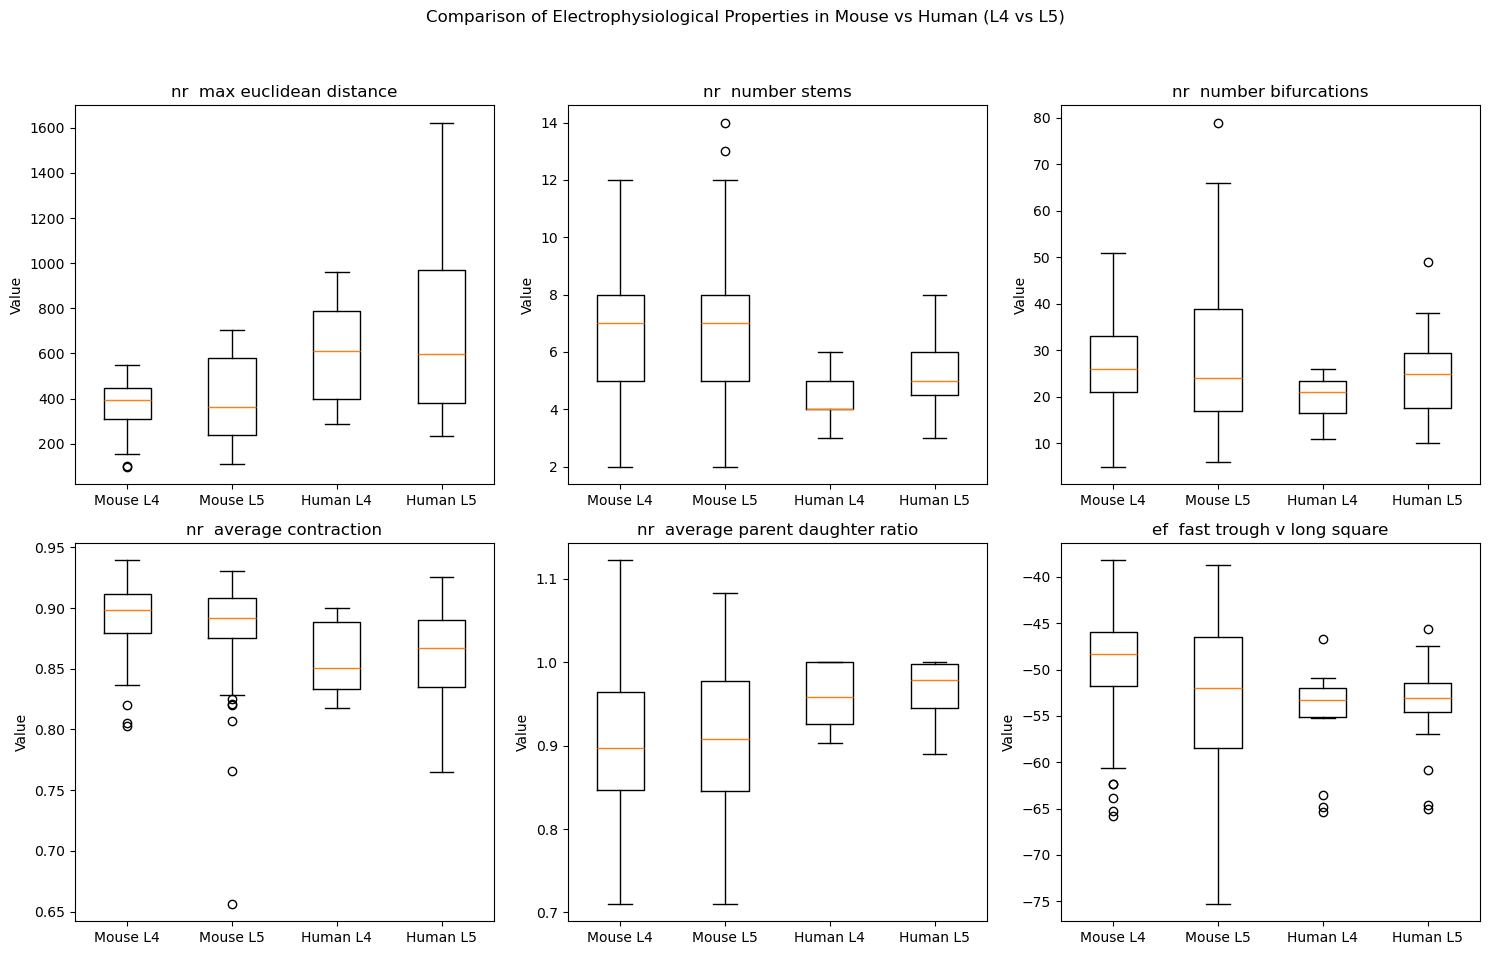

In [17]:
# Create a box plot comparing L4 and L5 between mouse and human
plt.figure(figsize=(15, 10))

for i, col in enumerate(ephys_columns_filtered[:6]):  # Plot first 6 features for clarity
    plt.subplot(2, 3, i + 1)
    plt.boxplot([
        mouse_L4_ephys[col].dropna(), 
        mouse_L5_ephys[col].dropna(),
        human_L4_ephys[col].dropna(), 
        human_L5_ephys[col].dropna()
    ], labels=['Mouse L4', 'Mouse L5', 'Human L4', 'Human L5'])
    
    plt.title(col.replace('_', ' '))
    plt.ylabel('Value')

plt.suptitle("Comparison of Electrophysiological Properties in Mouse vs Human (L4 vs L5)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


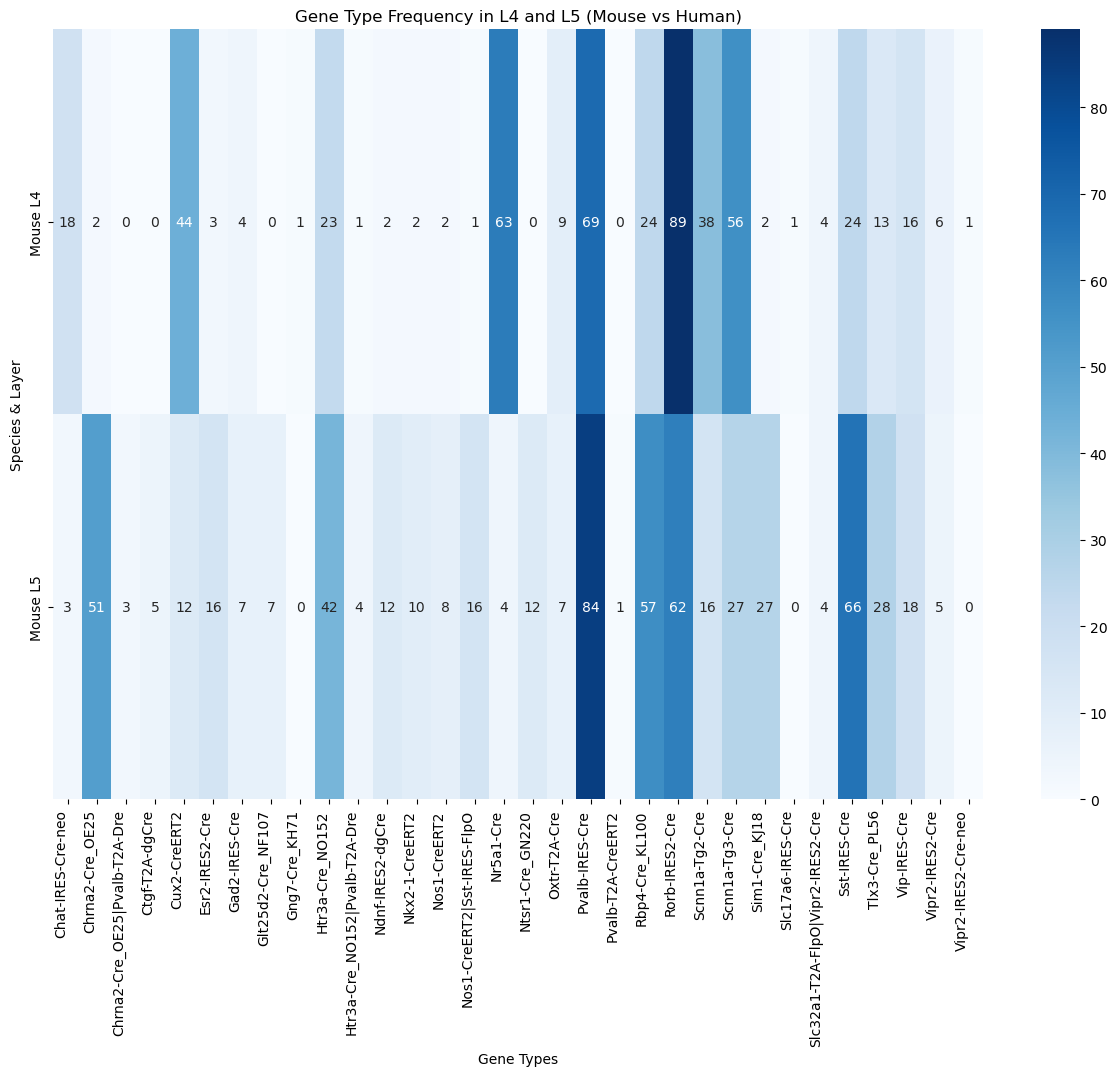

In [30]:

l4_l5_gene_counts = pd.concat([
    mouse_L4[['line_name']].assign(Species_Layer='Mouse L4'),
    mouse_L5[['line_name']].assign(Species_Layer='Mouse L5'),
    human_L4[['line_name']].assign(Species_Layer='Human L4'),
    human_L5[['line_name']].assign(Species_Layer='Human L5')
])


l4_l5_gene_counts = l4_l5_gene_counts.dropna()
gene_frequencies = l4_l5_gene_counts.groupby(['Species_Layer', 'line_name']).size().unstack(fill_value=0)


plt.figure(figsize=(15, 10))
sns.heatmap(gene_frequencies, annot=True, cmap="Blues", fmt="d")

plt.title("Gene Type Frequency in L4 and L5 (Mouse vs Human)")
plt.xlabel("Gene Types")
plt.ylabel("Species & Layer")
plt.xticks(rotation=90, ha="right")

plt.show()


In [4]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

## Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [5]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

## Conclusion & Discussion

*Fill in your discussion information here*